## Project Overview

The project aims to develop a predictive model to forecast taxi fares in New York City using a comprehensive dataset of taxi trip records. By analyzing key factors such as trip distance, passenger count, location identifiers, and additional fare components (e.g., tips, tolls, surcharges), the project seeks to improve fare estimation accuracy and optimize pricing strategies for taxi services.


### Data Dictionary

Two datasets will be used in this project. A comprehensive record of taxi trips. Dataset 1 includes information such as pick-up and drop-off times, number of passengers, trip distance, and fare details. Dataset 2 includes geographic locations to facilitate the construction of interactive maps. In the Jupyter Notebook study, we will mainly use dataset 1 to build the model.

### Dataset 1 (Model Building)
- `VendorID`: Taxi vendor identifier
- `tpep_pickup_datetime`: Trip start timestamp
- `tpep_dropoff_datetime`: Trip end timestamp
- `passenger_count`: Number of passengers
- `trip_distance`: Distance of the trip in miles
- `RatecodeID`: Trip rate code
- `store_and_fwd_flag`: Data storage and forwarding flag
- `PULocationID`: Pickup location zone ID
- `DOLocationID`: Dropoff location zone ID
- `payment_type`: Payment method used
- `fare_amount`: Base fare amount
- `extra`: Additional charges
- `mta_tax`: Mandatory MTA tax
- `tip_amount`: Tip amount
- `tolls_amount`: Toll charges
- `improvement_surcharge`: NYC transportation improvement surcharge
- `total_amount`: Total fare amount
- `congestion_surcharge`: Congestion surcharge

### Dataset 2 (Mapping and Analysis)
- `key`: Unique trip identifier
- `fare_amount`: Total fare (USD)
- `pickup_datetime`: Trip start time
- `pickup_longitude`, `pickup_latitude`: Pickup location
- `dropoff_longitude`, `dropoff_latitude`: Dropoff location
- `passenger_count`: Number of passengers
       

## Data cleaning and EDA

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data/fare_prediction_model_data.csv')
df

/var/folders/tl/rg7n5ym95sz39_h_687yw9pc0000gn/T/ipykernel_9693/3845470004.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/fare_prediction_model_data.csv')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


Since this dataset is so large, we will only use the first one million rows of the dataset.

In [9]:
# import pandas as pd

# Load the dataset (update 'your_dataset_path.csv' with your actual file path)
# file_path = 'nyc_taxi.csv'
# data = pd.read_csv('nyc_taxi.csv')

# Extract the first one million rows
# subset_data = data.head(1000000)

# Save the extracted rows to a new CSV file
# output_file = 'new_nyc_taxi.csv'
# subset_data.to_csv(output_file, index=False)

# print(f"Extracted data saved to {output_file}")

In [10]:
df = pd.read_csv('data/new_fare_prediction_model_data.csv')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.0,2020-01-06 19:02:23,2020-01-06 19:07:50,2.0,0.83,1.0,N,161,237,1.0,6.0,1.0,0.5,0.70,0.0,0.3,11.00,2.5
999996,2.0,2020-01-06 19:21:33,2020-01-06 19:35:41,2.0,2.40,1.0,N,161,113,1.0,11.0,1.0,0.5,1.20,0.0,0.3,16.50,2.5
999997,2.0,2020-01-06 19:42:58,2020-01-06 19:48:29,2.0,0.95,1.0,N,249,79,1.0,5.5,1.0,0.5,2.00,0.0,0.3,11.80,2.5
999998,2.0,2020-01-06 19:56:06,2020-01-06 20:08:07,2.0,2.54,1.0,N,107,50,1.0,10.5,1.0,0.5,3.70,0.0,0.3,18.50,2.5


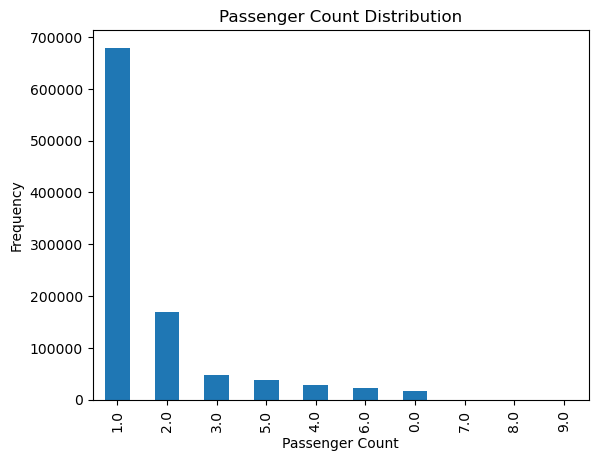

In [11]:
# Passenger Count Distribution
# Draw a bar graph of the distribution of the number of passengers to determine which group of people ride in a taxi more frequently.

data = pd.read_csv('data/new_fare_prediction_model_data.csv')
data['passenger_count'].value_counts().plot(kind='bar')
plt.title('Passenger Count Distribution')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

This bar chart shows the distribution of passenger counts in NYC taxi trips. The majority of trips have 1 passenger, followed by 2 passengers. Trips with 3 or more passengers are significantly less common, indicating that most taxi rides are used for solo travel or small groups.


In [12]:
# Rename columns
data.rename(columns={
    'tpep_pickup_datetime': 'pickup_datetime',
    'tpep_dropoff_datetime': 'dropoff_datetime'
}, inplace=True)

# Verify changes
print(data.columns)


Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge'],
      dtype='object')


In [26]:
# Fare by Hour of the Day

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_day'] = data['pickup_datetime'].dt.day_name()

# Trips by hour
trips_by_hour = data.groupby('pickup_hour').size()

# Trips by day of the week
trips_by_day = data.groupby('pickup_day').size()


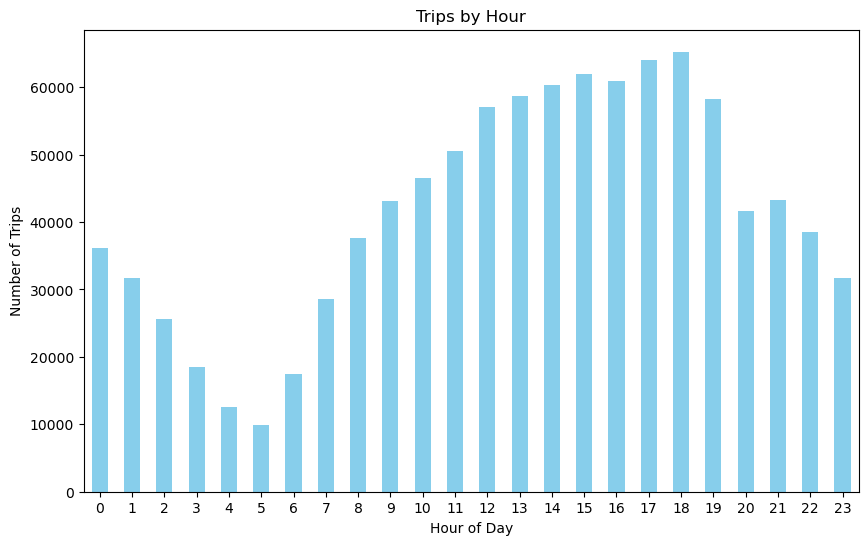

In [28]:
import matplotlib.pyplot as plt

trips_by_hour.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


The bar chart displays trips by the hour of the day. Demand steadily increases from morning until a peak around 5 PM, aligning with rush hour, and then gradually declines into the night.

## Using linear regression to create an interactive predict model

In [112]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

file_path = 'data/new_fare_prediction_model_data.csv'
data = pd.read_csv(file_path)

# Convert `tpep_pickup_datetime` to datetime format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

# Extract `hour_of_day` and `day_of_week` from `tpep_pickup_datetime`
data['hour_of_day'] = data['tpep_pickup_datetime'].dt.hour
data['day_of_week'] = data['tpep_pickup_datetime'].dt.dayofweek

# Select relevant features and target variable
data = data[['trip_distance', 'fare_amount', 'hour_of_day', 'day_of_week']].dropna()

# Define features (X) and target (y)
X = data[['trip_distance', 'hour_of_day', 'day_of_week']]
y = data['fare_amount']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model (optional)
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on the test set
y_pred = model.predict(X_test)


# Initialize Dash app
app = dash.Dash(__name__)

# Define layout with pastel colors and clean design
app.layout = html.Div([
    html.Div([
        html.H1("Taxi Fare Prediction（Linear Regression Model)", style={
            'textAlign': 'center', 'color': '#6a5acd', 'fontSize': '32px', 'fontWeight': 'bold'
        }),
        html.P("Predict your taxi fare with a few clicks!", style={
            'textAlign': 'center', 'color': '#9370db', 'fontSize': '18px'
        }),
    ], style={'backgroundColor': '#f9f3fc', 'padding': '20px', 'borderRadius': '10px'}),
    
    html.Div([
        html.Div([
            html.Label("🚕 Trip Distance (miles):", style={'color': '#6a5acd', 'fontWeight': 'bold', 'fontSize': '16px'}),
            dcc.Input(id='trip_distance', type='number', placeholder="Enter trip distance", style={
                'width': '100%', 'padding': '10px', 'borderRadius': '5px', 'border': '1px solid #dcdcdc'
            }),
        ], style={'marginBottom': '20px'}),
        
        html.Div([
            html.Label("⏰ Hour of Day (0-23):", style={'color': '#6a5acd', 'fontWeight': 'bold', 'fontSize': '16px'}),
            dcc.Slider(id='hour', min=0, max=23, step=1, value=12, marks={i: str(i) for i in range(0, 24)}),
        ], style={'marginBottom': '20px'}),
        
        html.Div([
            html.Label("📅 Day of the Week:", style={'color': '#6a5acd', 'fontWeight': 'bold', 'fontSize': '16px'}),
            dcc.Dropdown(
                id='day_of_week',
                options=[
                    {'label': 'Monday', 'value': 0},
                    {'label': 'Tuesday', 'value': 1},
                    {'label': 'Wednesday', 'value': 2},
                    {'label': 'Thursday', 'value': 3},
                    {'label': 'Friday', 'value': 4},
                    {'label': 'Saturday', 'value': 5},
                    {'label': 'Sunday', 'value': 6},
                ],
                placeholder="Select a day",
                style={'width': '100%', 'padding': '10px', 'borderRadius': '5px', 'border': '1px solid #dcdcdc'}
            ),
        ], style={'marginBottom': '20px'}),
        
        html.Button('Predict Fare', id='predict-button', n_clicks=0, style={
            'backgroundColor': '#9370db', 'color': 'white', 'border': 'none', 
            'padding': '10px 20px', 'borderRadius': '10px', 'cursor': 'pointer',
            'fontSize': '16px'
        }),
    ], style={'width': '50%', 'margin': '0 auto', 'padding': '20px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'borderRadius': '15px', 'backgroundColor': '#ffffff'}),
    
    html.Div(id='output-fare', style={
        'marginTop': '20px', 'textAlign': 'center', 'fontSize': '20px', 'color': '#6a5acd', 'fontWeight': 'bold'
    })
], style={'fontFamily': 'Comic Sans MS, sans-serif', 'backgroundColor': '#fff8f0', 'padding': '20px'})

# Callback function
@app.callback(
    Output('output-fare', 'children'),
    Input('predict-button', 'n_clicks'),
    [Input('trip_distance', 'value'),
     Input('hour', 'value'),
     Input('day_of_week', 'value')]
)
def predict_fare(n_clicks, trip_distance, hour, day_of_week):
    if trip_distance is not None and hour is not None and day_of_week is not None:
        # Ensure the input matches the model's feature expectations
        new_data = np.array([[trip_distance, hour, day_of_week]])
        predicted_fare = model.predict(new_data)
        return f"🌟 Predicted Fare: ${predicted_fare[0]:.2f} 🌟"
    return "Please enter values to predict your fare!"

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8060)  # Specify a different port number


My first predictive model was Linear Regression. It’s a simple yet powerful approach that worked well for this dataset. The model achieved an RMSE of 6.98 and an R² score of 0.71, meaning it explains 71% of the variability in taxi fares.

This model relies on features like trip distance, passenger count, and time-related variables, providing interpretable and accurate predictions. It’s effective for datasets with linear relationships, making it an ideal baseline model.

## Performance Testing

In [116]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_lr_pred = linear_model.predict(X_test)

# Performance Metrics for Linear Regression
lr_rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred))
lr_r2 = r2_score(y_test, y_lr_pred)

print("Linear Regression Model Performance:")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²: {lr_r2:.2f}")

Linear Regression Model Performance:
RMSE: 6.98
R²: 0.71


## Next Steps:  
In the following section, we will build a Random Forest prediction model and compare its performance with the Linear Regression model to evaluate their effectiveness.
